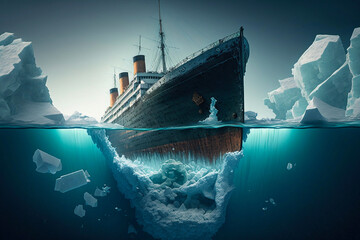

In [ ]:
from IPython.display import Image
url = 'https://t3.ftcdn.net/jpg/05/70/92/26/240_F_570922643_DPh6V3LhnUgSDDDbpznUvgKeGiF8TgnR.jpg'
Image(url)

# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Exploring Datasets

In [ ]:
data=pd.read_csv('titanic.csv',engine='python')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38
2,"Heikkinen, Miss. Laina",female,26
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35
4,"Allen, Mr. William Henry",male,35


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check Shape Of Data(Rows/Columns)
data.shape

(891, 12)

In [ ]:
# Check Information From Dataset
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Check Null Values (If Any)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Data Dictionary

*    Survived: 0->No, 1->Yes
*    Sex: Male/Female
*    Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*    Ticket: Ticket number
*    Cabin: Cabin number
*    Fare: Passenger Fare
*    Total Rows/Columns: There are 890 Rows and 12 Columns
*    SibSp: Number of Siblings/Spouses traveling with the passenger on the Titanic
*    Parch: Number of Parents/Children traveling with the  
     passenger on the Titanic
*    Embarked: Port of embarkation and it is a categorical feature
     that has 3 unique values (C, Q or S):
*   C = Cherbourg
*   Q = Queenstown
*   S = Southampton


# Exploratory Data Analysis

In [ ]:
data = pd.DataFrame({
    'Name': ['Braund, Mr. Owen Harris',
             'Cumings, Mrs. John Bradley (Florence Briggs Th...)',
             'Heikkinen, Miss. Laina',
             'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
             'Allen, Mr. William Henry'],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35]
})
data_groupby_sex = data.groupby('Sex')
print(data_groupby_sex.groups)

{'female': [1, 2, 3], 'male': [0, 4]}


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Check How Many Survived
data.head()
data.info()
data.columns
data['survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


0    549
1    342
Name: survived, dtype: int64

# Data Visualization-1

In [ ]:
sns.set()

<Axes: xlabel='count'>

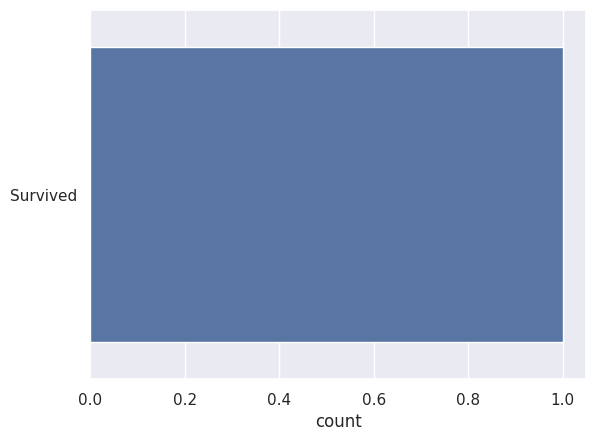

In [ ]:
sns.countplot('Survived')

Check How Many Non-Survived

<Axes: xlabel='count'>

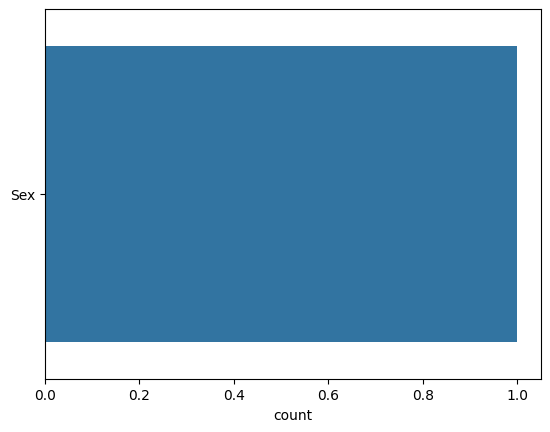

In [14]:
# Number Of Survivors According To Gender
sns.countplot('Sex')

<Axes: xlabel='count'>

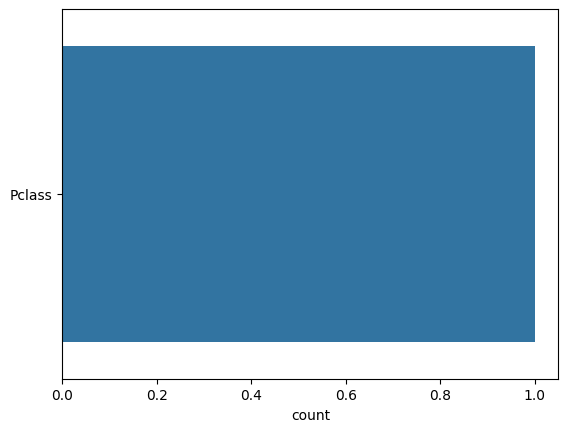

In [13]:
# Check Countplot For 'Pclass' Column
sns.countplot('Pclass')

<Axes: xlabel='count'>

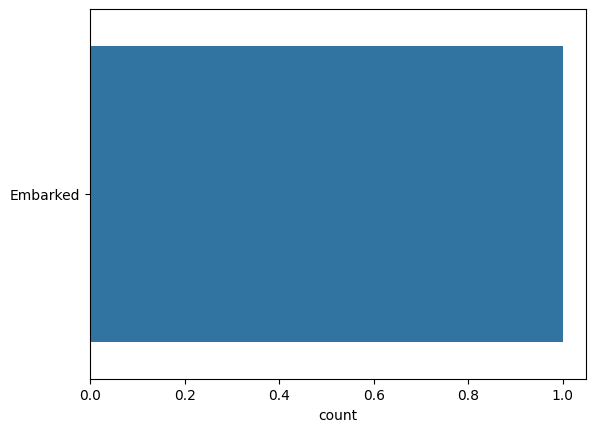

In [12]:
# Check For Embarked Column
sns.countplot('Embarked')

<Axes: xlabel='count'>

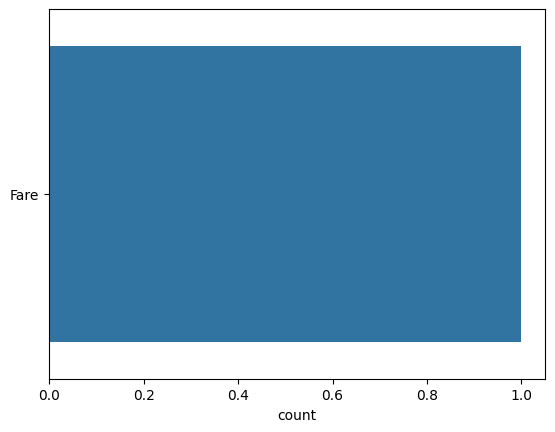

In [11]:
# Check For Fare Column
sns.countplot('Fare')

<Axes: xlabel='age', ylabel='Count'>

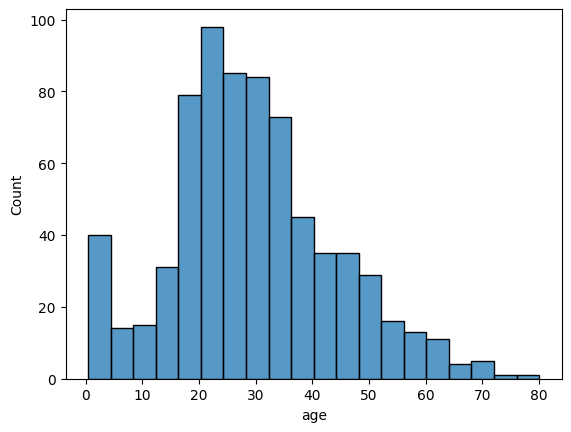

In [10]:
# Check For Numerical Attributes
data = sns.load_dataset("titanic")
sns.histplot(data=data, x="age")

<Axes: xlabel='fare', ylabel='Count'>

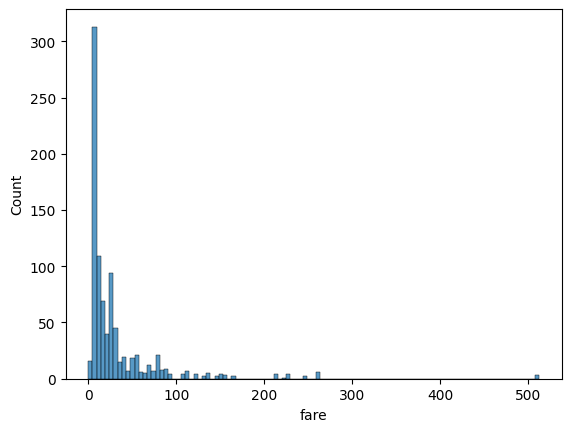

In [9]:
# Check For Fare Column
import seaborn as sns
data = sns.load_dataset("titanic")
sns.histplot(data=data, x="fare")

# Data Preprocessing-1
Check missing values in set(If any)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [ ]:
print(data['parch'].isna().value_counts())

parch
False    891
Name: count, dtype: int64


In [ ]:
print(data['age'].isna().value_counts())

age
False    714
True     177
Name: count, dtype: int64


In [ ]:
data.corr

<bound method DataFrame.corr of                                                 Name     Sex  Age
0                            Braund, Mr. Owen Harris    male   22
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38
2                             Heikkinen, Miss. Laina  female   26
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35
4                           Allen, Mr. William Henry    male   35>

In [ ]:
data.value_counts()

Name                                                Sex     Age
Allen, Mr. William Henry                            male    35     1
Braund, Mr. Owen Harris                             male    22     1
Cumings, Mrs. John Bradley (Florence Briggs Th...)  female  38     1
Futrelle, Mrs. Jacques Heath (Lily May Peel)        female  35     1
Heikkinen, Miss. Laina                              female  26     1
Name: count, dtype: int64

In [ ]:
data.fillna

<bound method NDFrame.fillna of                                                 Name     Sex  Age
0                            Braund, Mr. Owen Harris    male   22
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38
2                             Heikkinen, Miss. Laina  female   26
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35
4                           Allen, Mr. William Henry    male   35>

# Data Visualization-2

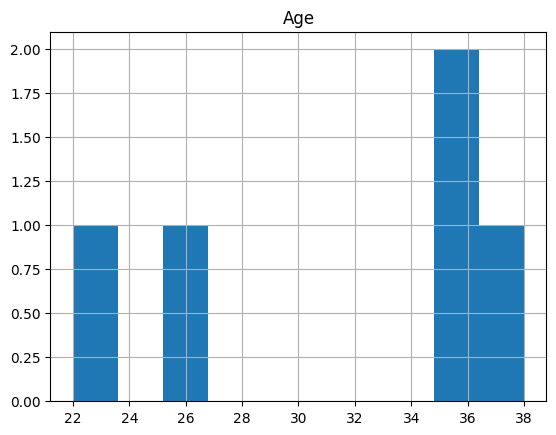

In [ ]:
data.hist()
plt.show()


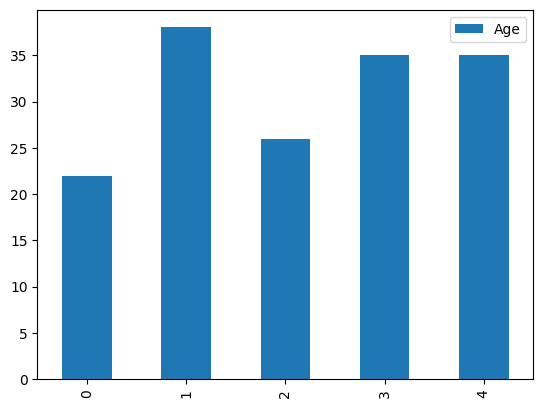

In [ ]:
data.plot(kind='bar')
plt.show()

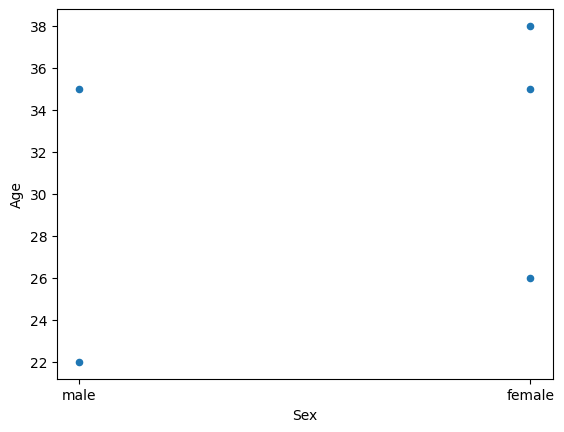

In [ ]:
data.plot(kind='scatter', x='Sex', y='Age')
plt.show()

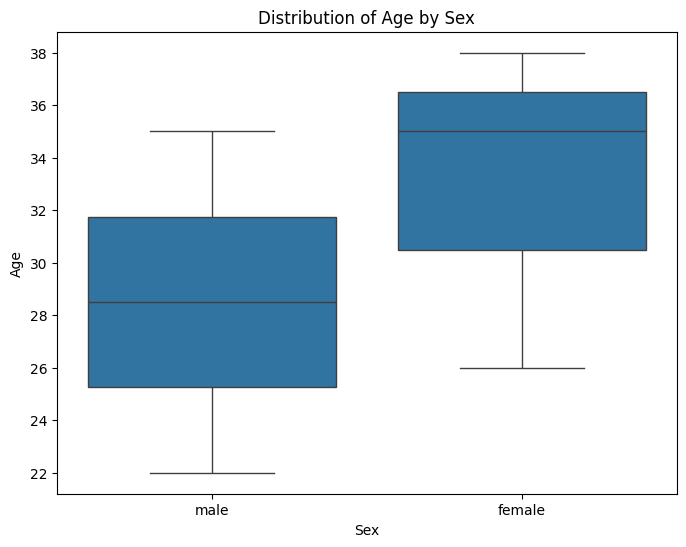

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=data)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Sex')
plt.show()

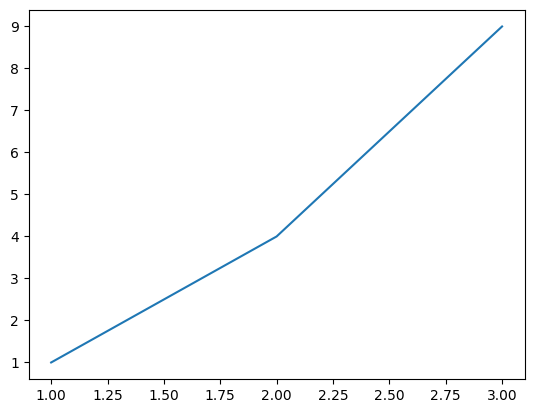

In [20]:
x=[1,2,3]
y=[1,4,9]
plt.plot(x,y)
plt.show()

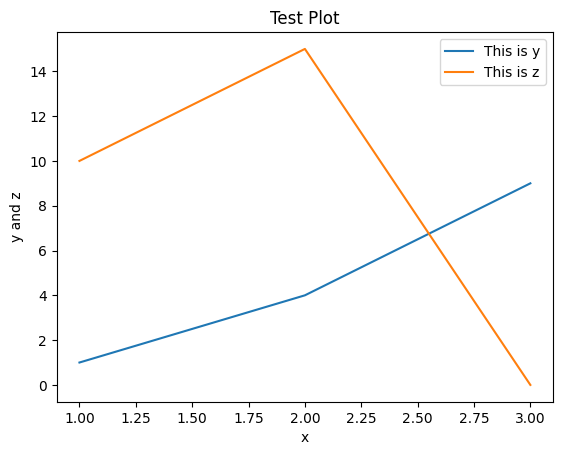

In [22]:
x=[1,2,3]
y=[1,4,9]
z=[10,15,0]
plt.plot(x,y)
plt.plot(x,z)
plt.title("Test Plot")
plt.xlabel("x")
plt.ylabel("y and z")
plt.legend(["This is y","This is z"])
plt.show()

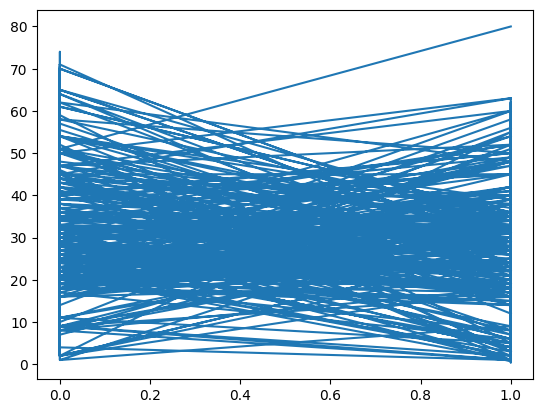

In [29]:
plt.plot(data.survived, data.age)
plt.show()

<Axes: xlabel='pclass', ylabel='fare'>

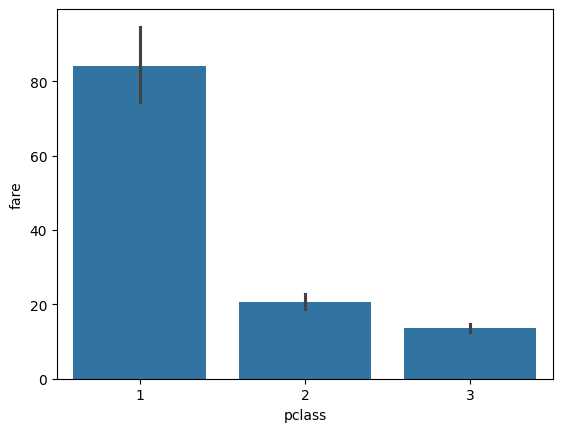

In [31]:
sns.barplot(x='pclass', y='fare', data=data)

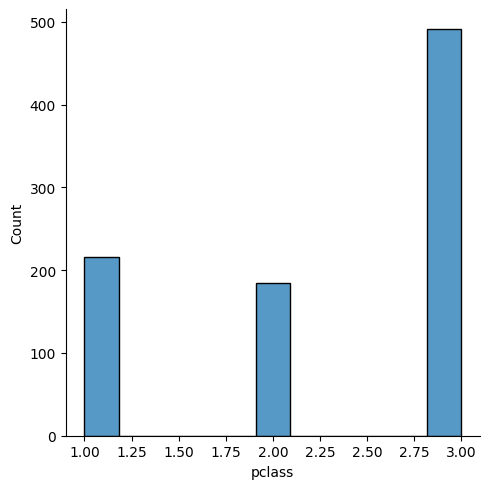

In [34]:
sns.displot(data=data, x="pclass")

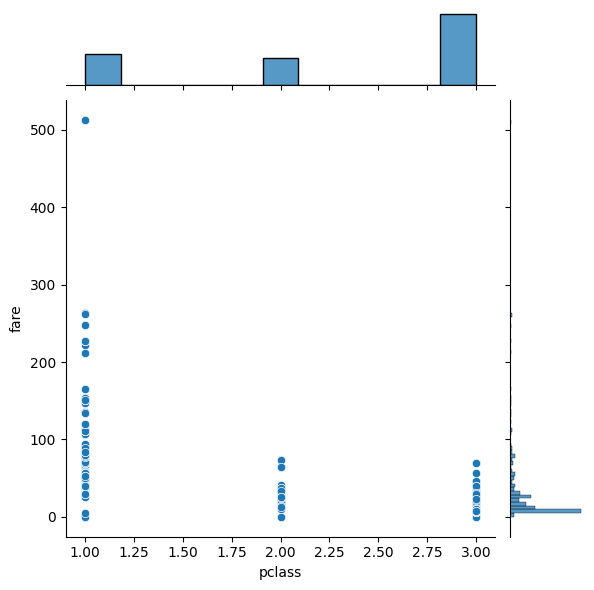

In [36]:
sns.jointplot(x='pclass', y='fare', data=data)

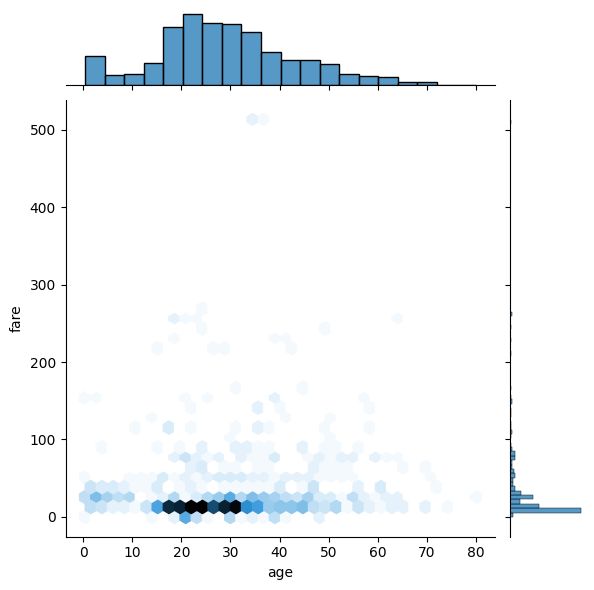

In [38]:
sns.jointplot(x='age', y='fare', data=data,kind="hex")

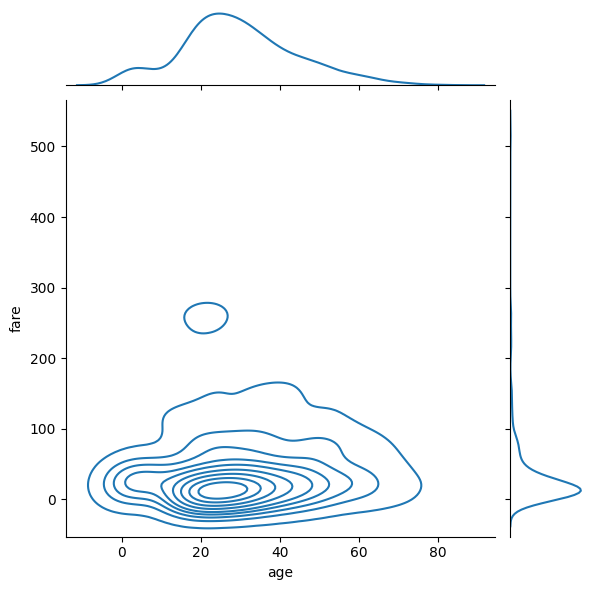

In [40]:
sns.jointplot(x='age', y='fare', data=data,kind="kde")

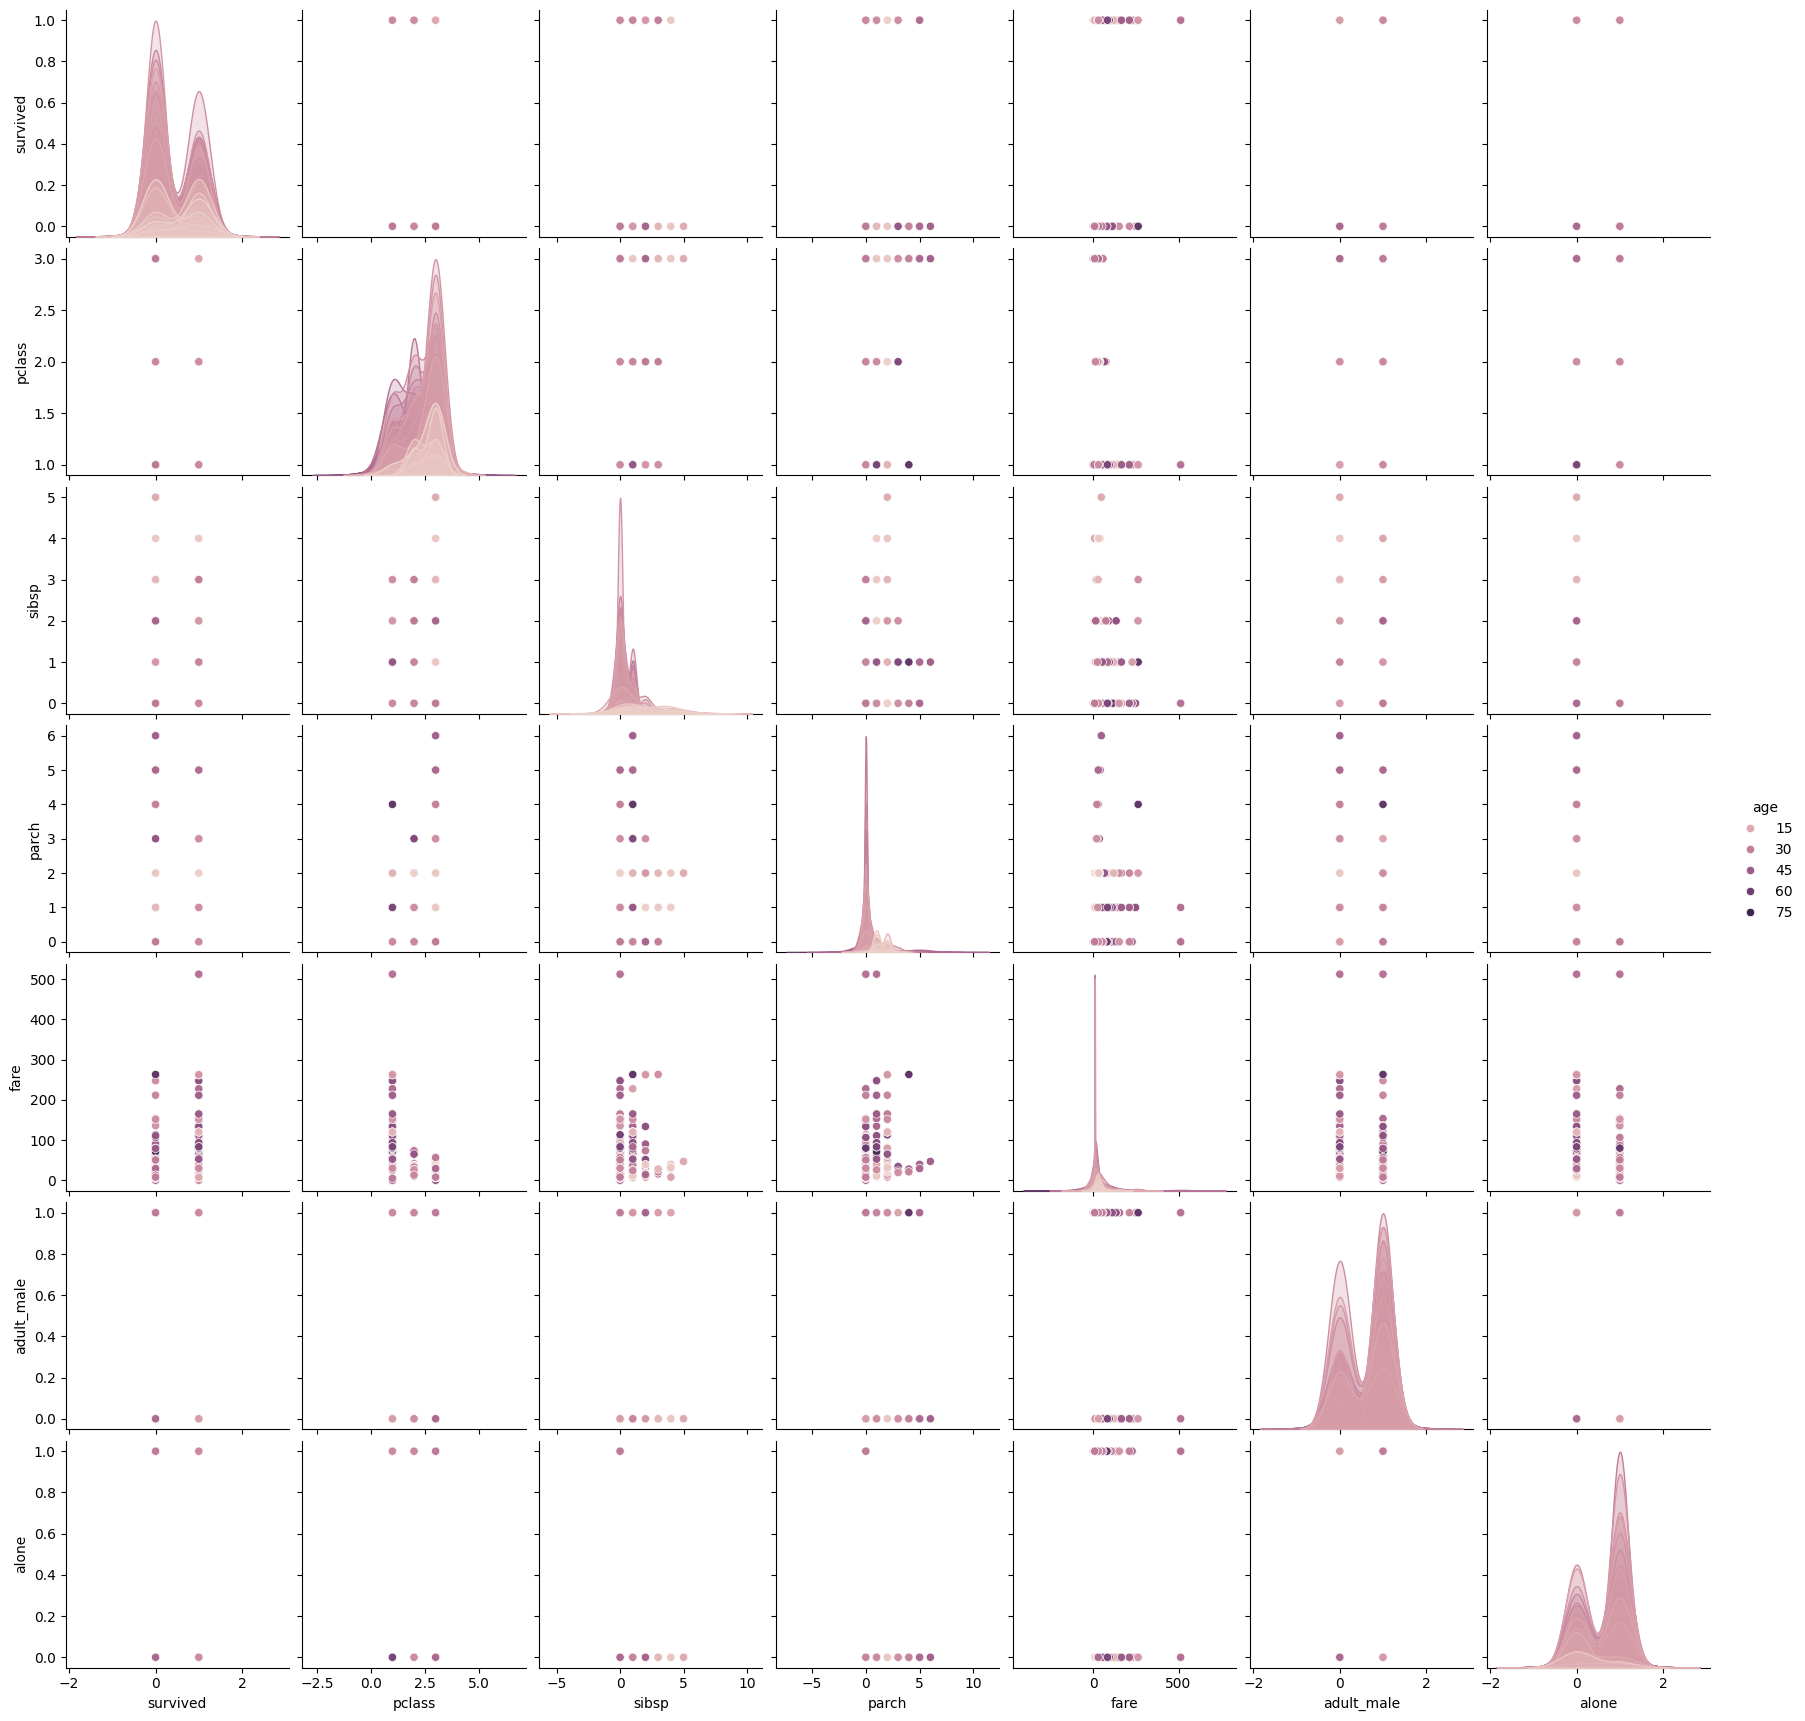

In [44]:
sns.pairplot(data=data, hue='age')

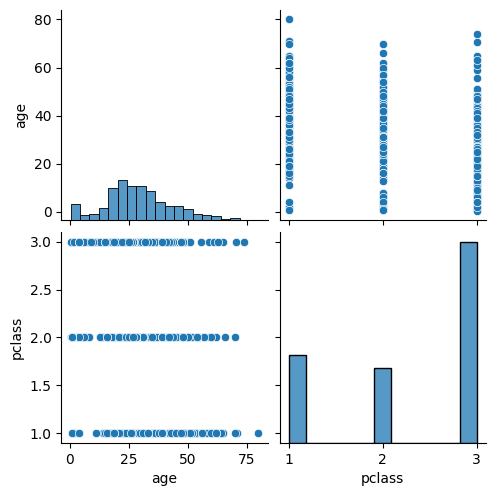

In [61]:
sns.pairplot(data[['age','pclass','sex']])

<Axes: xlabel='pclass', ylabel='fare'>

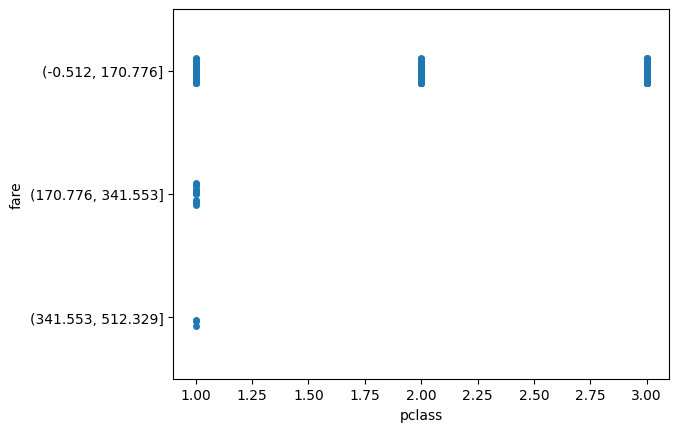

In [62]:
sns.stripplot(x='pclass', y='fare', data=data)

<Axes: xlabel='pclass', ylabel='fare'>

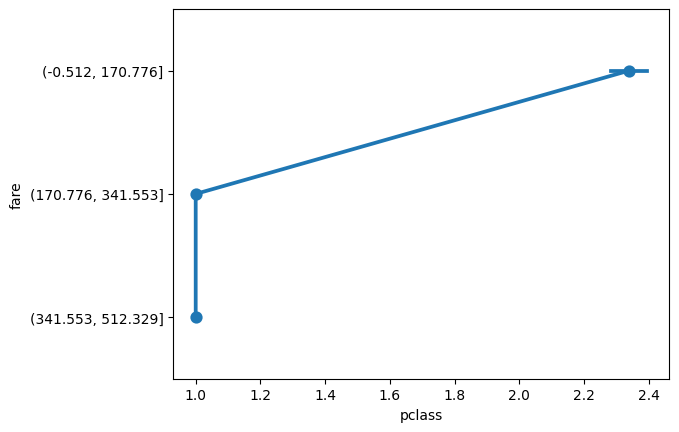

In [67]:
sns.pointplot(x='pclass', y='fare', data=data)

# Data Preprocessing-2

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
data = pd.DataFrame({
    'NumericalFeature1': [10, 20, 30, 40, 50],
    'NumericalFeature2': [1.5, 2.5, 3.5, 4.5, 5.5],
    'CategoricalFeature': ['A', 'B', 'A', 'C', 'B']
})
numerical_features = ['NumericalFeature1', 'NumericalFeature2']
categorical_feature = ['CategoricalFeature']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

label_encoder = LabelEncoder()
data['CategoricalFeature'] = label_encoder.fit_transform(data['CategoricalFeature'])

print(data)


   NumericalFeature1  NumericalFeature2  CategoricalFeature
0          -1.414214          -1.414214                   0
1          -0.707107          -0.707107                   1
2           0.000000           0.000000                   0
3           0.707107           0.707107                   2
4           1.414214           1.414214                   1


# Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load your dataset into a pandas DataFrame
data = pd.read_csv('titanic.csv')

# Preprocess your data (e.g., handle missing values, encode categorical variables)
# For simplicity, let's assume you're dropping rows with missing values and selecting relevant features
data = data.dropna(subset=['Age', 'Sex'])  # Dropping rows with missing Age or Sex
X = data[['Age', 'Sex']]  # Selecting 'Age' and 'Sex' as features
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)  # One-hot encoding 'Sex'

# Choose an appropriate target variable
y = data['Survived']  # Assuming 'Survived' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Create a pandas DataFrame to store evaluation metrics
evaluation_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Score': [accuracy, precision, recall, roc_auc]
})

print(evaluation_df)


      Metric     Score
0   Accuracy  0.734266
1  Precision  0.666667
2     Recall  0.642857
3    ROC AUC  0.717980


# Data Modelling

# Model Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('titanic.csv')

data = data.dropna(subset=['Age', 'Sex'])

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_mean_score = cv_scores.mean()
cv_std_score = cv_scores.std()

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['RandomForestClassifier'],
    'CV Mean Score': [cv_mean_score],
    'CV Std Score': [cv_std_score],
    'Best Params': [best_params],
    'Best Score': [best_score],
    'Test Accuracy': [test_accuracy]
})

print(results)


                    Model  CV Mean Score  CV Std Score  \
0  RandomForestClassifier       0.833638      0.013405   

                              Best Params  Best Score  Test Accuracy  
0  {'max_depth': 10, 'n_estimators': 200}    0.837132       0.797203  


# Data Cleaning

In [ ]:
data.fillna

<bound method NDFrame.fillna of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ... 

In [ ]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


In [ ]:
data['Age'].astype(float)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [ ]:
data['Sex'].replace({'male': 0, 'female': 1})

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 714, dtype: int64